In [101]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(0)

# BN in MLP (BatchNorm1d)

### Generate Data

In [123]:
# number of data
N=200
# mean/std Dimension 1
m1=1
std1=0.6
# mean/std Dimension 2
m2=1
std2=0.3
# slope
c=1

In [133]:
# Dimension 1
x1 = torch.normal(mean=m1*torch.ones(N,1), std=std1*torch.ones(N,1))
# Dimension 2
x2 = c * x1
x2 +=torch.normal(mean=m2*torch.ones(N,1), std=std2*torch.ones(N,1))
# Data
x = torch.concat([x1,x2], dim=1)

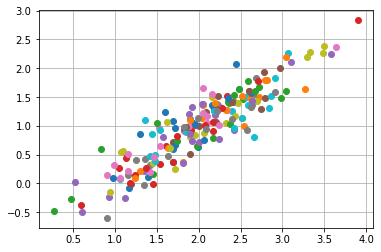

In [134]:
# Preprocess for use plot
x_p=x.numpy()
for i in range(0,N):
    plt.plot(x_p[i,1],x_p[i,0],'o')
    plt.grid(True)

### Follow BatchNorm1d

In [126]:
# get instance from class BatchNorm1d (Layer)
batch1d=torch.nn.BatchNorm1d(2)
print(batch1d.weight)
print(batch1d.bias)

Parameter containing:
tensor([1., 1.], requires_grad=True)
Parameter containing:
tensor([0., 0.], requires_grad=True)


In [127]:
# Feed Data to Batch Norm layer
y = batch1d(x)

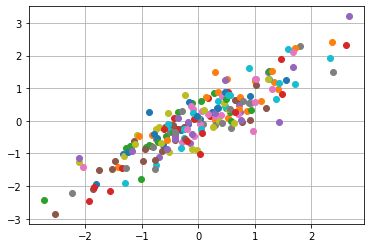

In [135]:
# Preprocess for use plot
y_p=y.detach().numpy()
for i in range(0,N):
    plt.plot(y_p[i,1],y_p[i,0],'o')
    plt.grid(True)

### Conclusion

In [136]:
print(torch.mean(x, dim=0))
print(torch.std(x,dim=0))

tensor([1.0016, 2.0189])
tensor([0.6290, 0.6609])


In [137]:
print(torch.mean(y, dim=0))
print(torch.std(y,dim=0))

tensor([ 3.3379e-08, -3.8028e-07], grad_fn=<MeanBackward1>)
tensor([1.0025, 1.0025], grad_fn=<StdBackward0>)


# BN in CNN (BatchNorm2d)

### Generate Data

In [145]:
# Sample 1
sample_1 = torch.ones(1,2,5,5)
# Sample 2
sample_2 = torch.zeros(1,2,5,5)
data = torch.concat([sample_1,sample_2], dim=0)
print(data.shape)
print(data)

torch.Size([2, 2, 5, 5])
tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


### Follow BatchNorm2d

In [149]:
# Feed Data to Batch Norm layer
batch2d=torch.nn.BatchNorm2d(2)
print(batch2d.weight)
print(batch2d.bias)

Parameter containing:
tensor([1., 1.], requires_grad=True)
Parameter containing:
tensor([0., 0.], requires_grad=True)


In [157]:
# Feed Data to Batch Norm layer
y = batch2d(data)

In [158]:
print(y)

tensor([[[[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000]]],


        [[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.

### Perform by yourself

In [194]:
# Calculate mean/std every channels along all data
mio = torch.mean(data, dim=0)
var = torch.var(data, dim=0)
print(mio.shape)
print(var.shape)

torch.Size([2, 5, 5])
torch.Size([2, 5, 5])


In [195]:
# Operate
y_hat = (data - mio) / var

In [196]:
# Compression
y.detach().to(torch.float16) == y_hat.to(torch.float16)

tensor([[[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]],

         [[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]]],


        [[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]],

         [[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]]]])